# A machine Learning model for predicting Sepsis

Introduction:
**Sepsis**  a life-threatening medical emergency. Sepsis happens when an infection you already have triggers a chain reaction throughout your body.

### 1.0 Business Understanding

Goal: To build a ML model that predicts early sepsis .Prompt identification and intervention in cases of sepsis are pivotal in preventing its progression and reducing mortality rates.

Null Hypothesis (H0): There is no significant relationship between a patient's age and the likelihood of developing sepsis.

Alternative Hypothesis (H1): The age of a patient is a significant factor that influences the likelihood of developing sepsis.

##### Analytical Questions
1. What is the distribution of Sepsis
2. What is the distribution of Age
3. How Many Patients have Insurance
4. Is Blood Pressure Affected by Age
5. How many patients in each BMI category have sepsis?
6. How many of the patients fall under the Normal, Elevated and High Blood Pressure?

##### Feature Explanation 
- **ID**: number to represent patient ID
- **PRG**: Plasma glucose
- **PL**: Blood Work Result-1 (mu U/ml)
- **PR**: Blood Pressure (mm Hg)
- **SK**: Blood Work Result-2 (mm)
- **TS**: Blood Work Result-3 (mu U/ml)
- **M11**: Body mass index (weight in kg/(height in m)^2)
- **BD2**: Blood Work Result-4 (mu U/ml)
- **Age**: patients age (years)
- **Insurance**: If a patient holds a valid insurance card
- **Sepsis**: Positive: if a patient in ICU will develop a sepsis , and Negative: otherwise

### 2.0 Data Understanding

##### Importations

In [24]:
# Data Manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Hypothesis Testing
from scipy import stats
import statistics as stat

# Encoding
from sklearn.preprocessing import LabelEncoder
# statistics
from scipy import stats
# machine learning
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer, LabelEncoder,MinMaxScaler,RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import RandomOverSampler,SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from prettytable import PrettyTable
import joblib
import os




#Data balancing
#import imblearn
#import sklearn
#from imblearn.over_sampling import SMOTE
#from imblearn.utils.validation import _check_X


Load Dataset

In [2]:
# load train and test dataset
url = ("data/raw/Paitients_Files_Train.csv")
train_data = pd.read_csv(url)

url_2 = ("data/raw/Paitients_Files_Test.csv")
test_data = pd.read_csv(url_2)

train_data

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive
...,...,...,...,...,...,...,...,...,...,...,...
594,ICU200604,6,123,72,45,230,33.6,0.733,34,0,Negative
595,ICU200605,0,188,82,14,185,32.0,0.682,22,1,Positive
596,ICU200606,0,67,76,0,0,45.3,0.194,46,1,Negative
597,ICU200607,1,89,24,19,25,27.8,0.559,21,0,Negative


In [12]:
# show test data dataframe
test_data

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0
...,...,...,...,...,...,...,...,...,...,...
164,ICU200773,10,101,76,48,180,32.9,0.171,63,1
165,ICU200774,2,122,70,27,0,36.8,0.340,27,1
166,ICU200775,5,121,72,23,112,26.2,0.245,30,1
167,ICU200776,1,126,60,0,0,30.1,0.349,47,1


EDA

In [4]:
# check the info of the train dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [5]:
# check for duplicated values
train_data.duplicated().sum()

0

In [6]:
# check for null values in the dataset
train_data.isna().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

In [7]:
# describe the values
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
PRG,599.0,3.824708,3.362839,0.000,1.000,3.000,6.000,17.00
PL,599.0,120.153589,32.682364,0.000,99.000,116.000,140.000,198.00
PR,599.0,68.732888,19.335675,0.000,64.000,70.000,80.000,122.00
SK,599.0,20.562604,16.017622,0.000,0.000,23.000,32.000,99.00
TS,599.0,79.460768,116.576176,0.000,0.000,36.000,123.500,846.00
M11,599.0,31.920033,8.008227,0.000,27.100,32.000,36.550,67.10
BD2,599.0,0.481187,0.337552,0.078,0.248,0.383,0.647,2.42
Age,599.0,33.290484,11.828446,21.000,24.000,29.000,40.000,81.00
Insurance,599.0,0.686144,0.464447,0.000,0.000,1.000,1.000,1.00


**Univariate Analysis:**
     Explore individual variables for insights.

[]

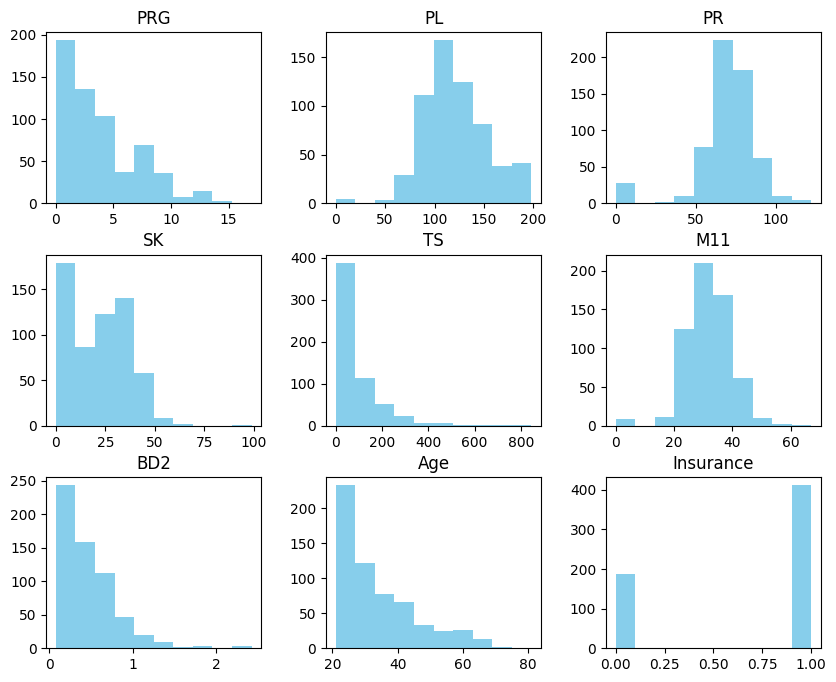

In [8]:
# visualize the underlining distribution of the dataset
train_data.hist(figsize=(10,8),color="skyblue",grid=False,bins=10)
plt.plot()

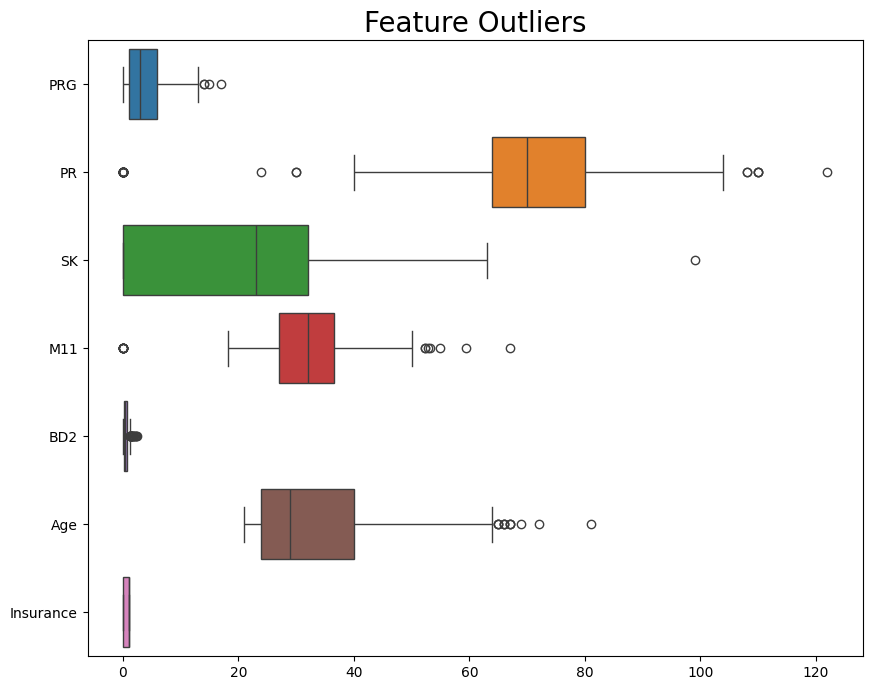

In [9]:
# visualize the outliers
plt.figure(figsize=(10,8))
sns.boxplot(train_data.drop(['TS','PL'],axis=1),orient="h")
plt.title("Feature Outliers",fontsize = 20)
plt.show()

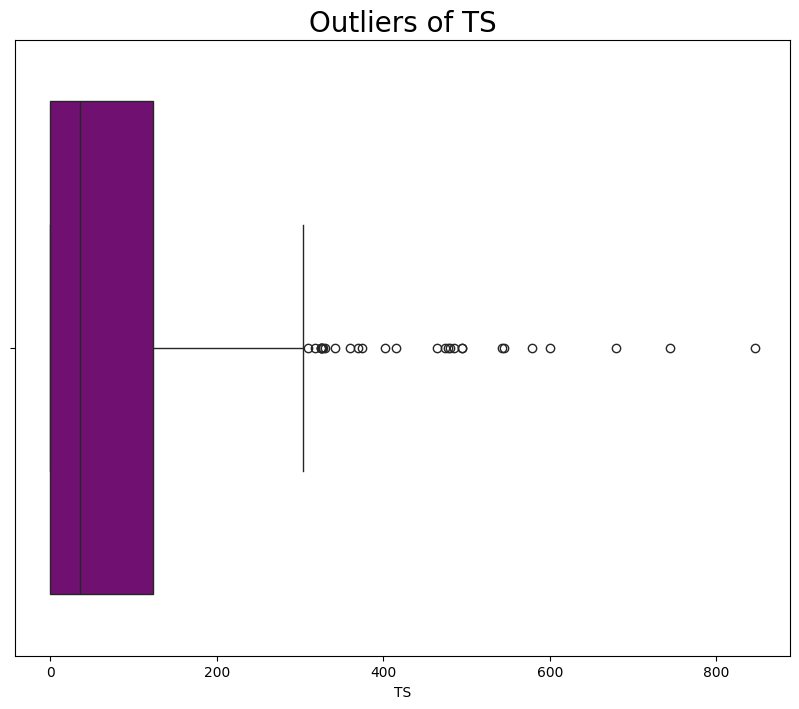

In [10]:
# box plot of outliers for ts column
plt.figure(figsize=(10,8))
sns.boxplot(train_data['TS'],orient="h",color="purple")
plt.title("Outliers of TS",fontsize = 20)
plt.show()

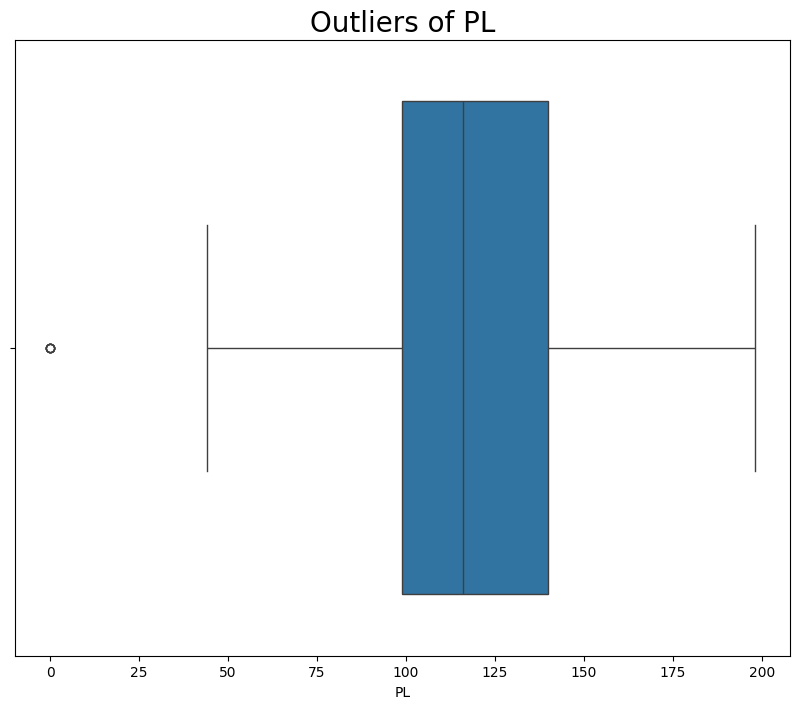

In [11]:
# plotting a boxplot of outliers for PL volumn
plt.figure(figsize=(10,8))
sns.boxplot(train_data['PL'],orient="h")
plt.title("Outliers of PL",fontsize = 20)
plt.show()

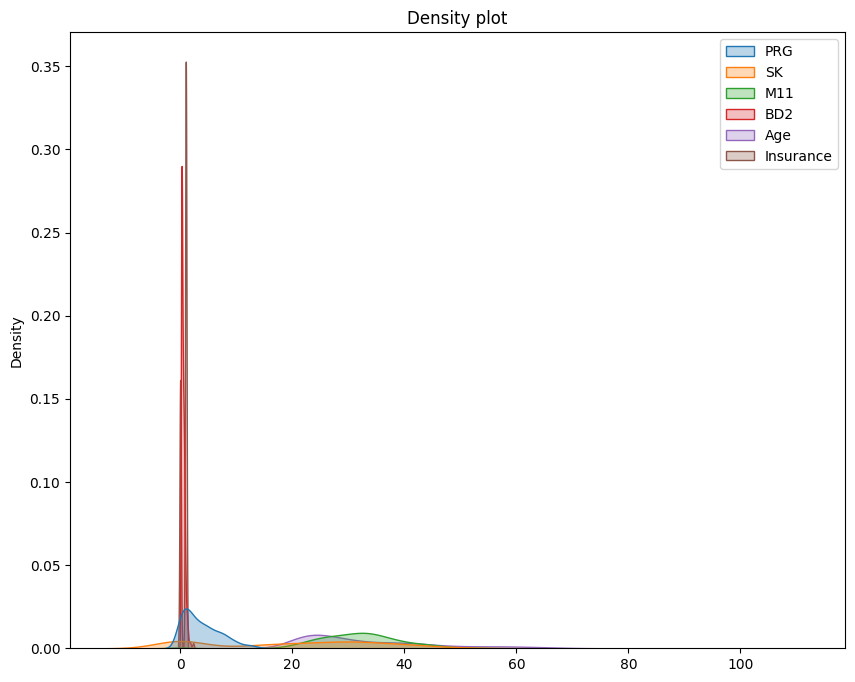

In [15]:
# plot a kde
plt.figure(figsize=(10,8))
sns.kdeplot(data = train_data.drop(['TS','PL','PR'],axis=1),fill=True,alpha = 0.3)
plt.title("Density plot")
plt.show()

<Axes: ylabel='Density'>

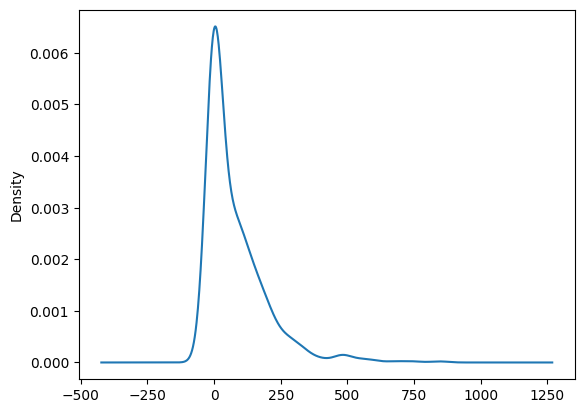

In [4]:
train_data['TS'].plot(kind= 'kde')

Key Insights:

- The mean and the median seems to closely follow each other
- PR and PL seems to follow the bell curve shape of distribution
- PRG and Age is left skewed

**Bivariate Analysis:**
     Investigate relationships between pairs of variables.

In [5]:
# check for correlation between the columns
correlation = train_data.corr(numeric_only=True)

correlation

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
PRG,1.000000,0.139541,0.116680,-0.080902,-0.054812,0.033482,-0.052230,0.532545,0.084631
PL,0.139541,1.000000,0.143064,0.054430,0.339818,0.215949,0.144665,0.274057,0.050993
PR,0.116680,0.143064,1.000000,0.197535,0.095281,0.269482,0.008318,0.225625,-0.025365
SK,-0.080902,0.054430,0.197535,1.000000,0.429068,0.377950,0.176592,-0.121553,-0.017360
TS,-0.054812,0.339818,0.095281,0.429068,1.000000,0.184747,0.218313,-0.011523,0.041560
M11,0.033482,0.215949,0.269482,0.377950,0.184747,1.000000,0.127675,0.046117,0.026826
BD2,-0.052230,0.144665,0.008318,0.176592,0.218313,0.127675,1.000000,0.033567,0.006114
Age,0.532545,0.274057,0.225625,-0.121553,-0.011523,0.046117,0.033567,1.000000,0.054368
Insurance,0.084631,0.050993,-0.025365,-0.017360,0.041560,0.026826,0.006114,0.054368,1.000000


<Axes: >

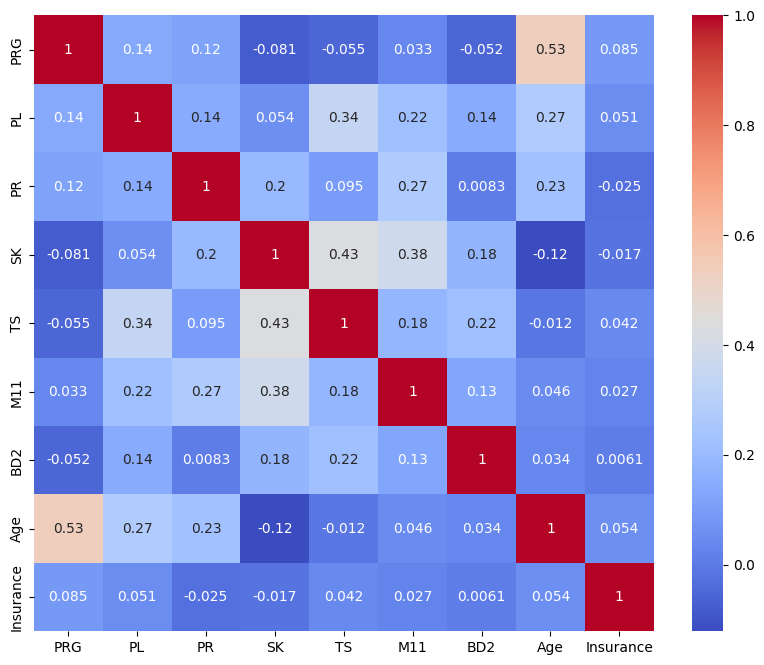

In [6]:
# plot a heatmap to show the correlation
plt.figure(figsize=(10,8))
sns.heatmap(data = correlation,annot = True,cmap = 'coolwarm')

Insights:
- There's a weak correlation between the features

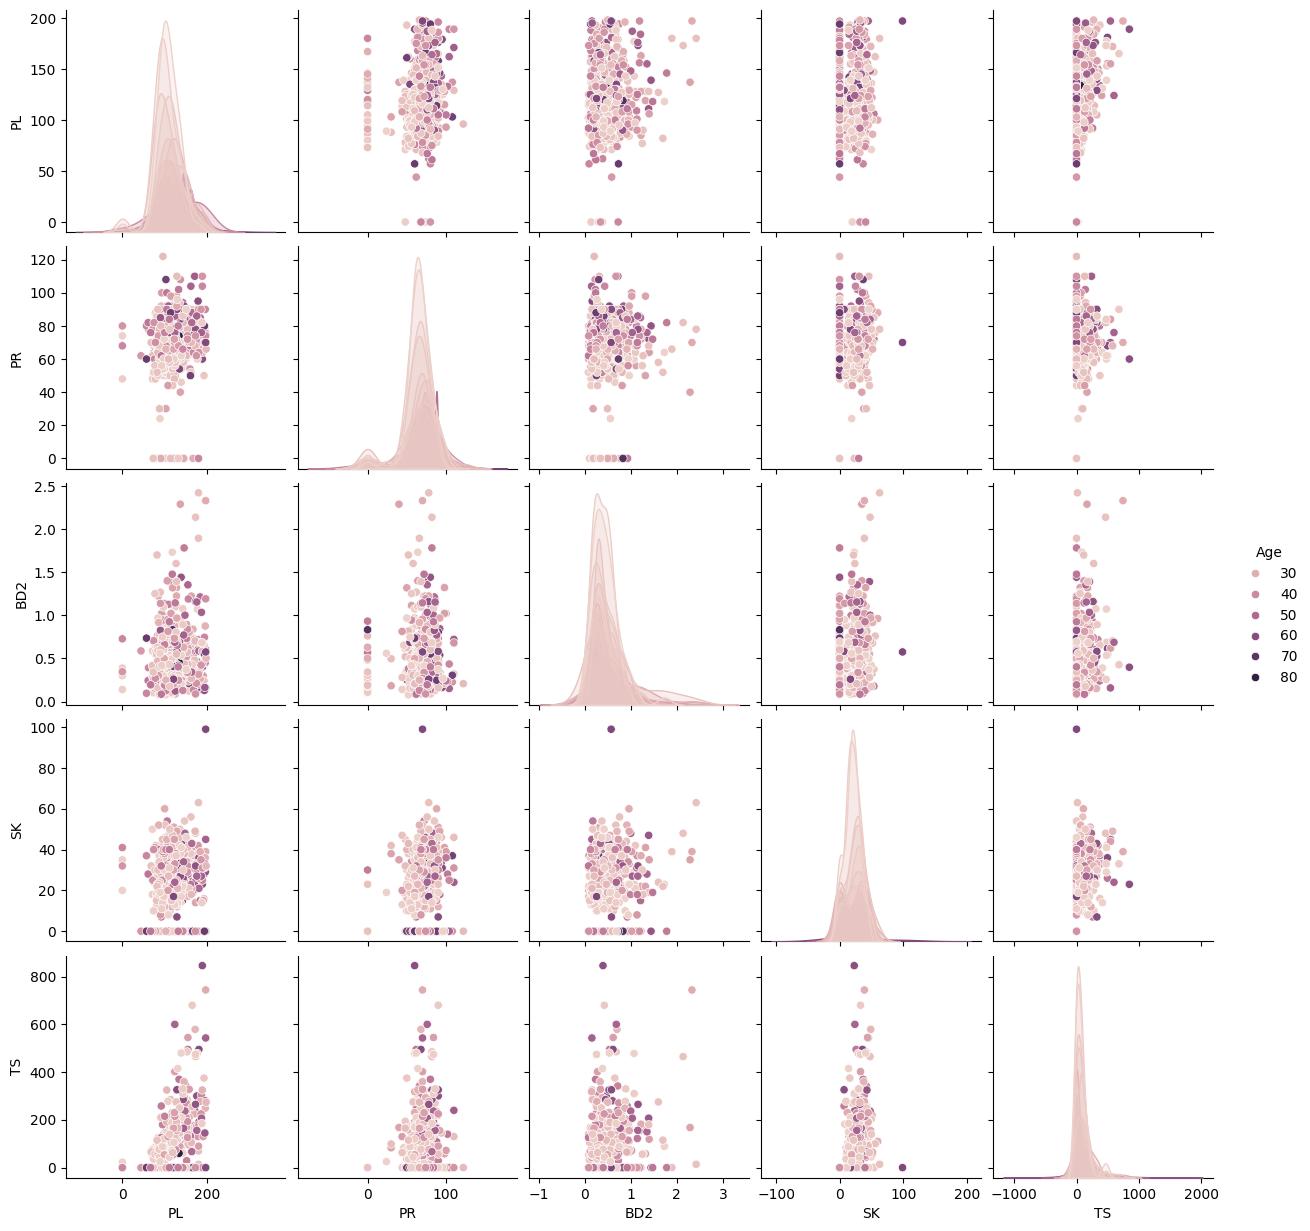

In [17]:
blood_features = train_data[['PL','PR','BD2','SK','TS','Age']]
sns.pairplot(data=blood_features,hue='Age')

##### Visualize Analytical Questions

##### 1. What the distribution of sepsis

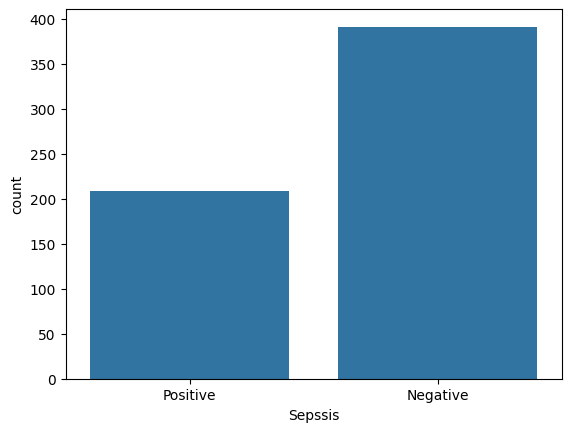

In [4]:
# Distribution of Sepsis
sns.countplot(x='Sepssis',data=train_data)
plt.show()

- There are 391 negative cases which are the patients who did not develop sepsis during their stay in the intensive Care Unit(ICU). The positive cases are 208

##### 2. What is the distribution of ages for patients captured in the data?

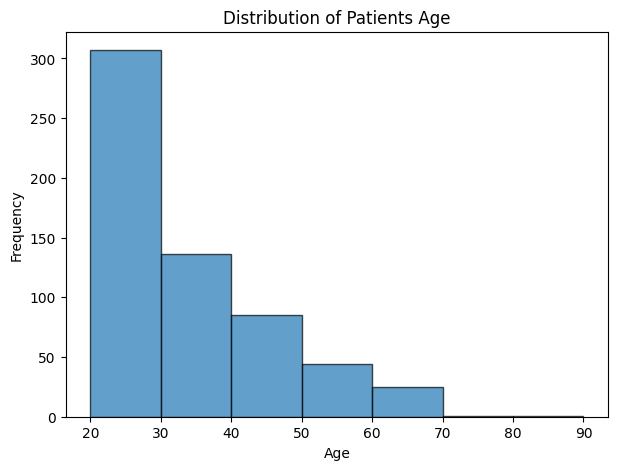

Mean Age: 33.29
Median Age: 29.0
Minimum Age: 21
Maximum Age: 81


In [5]:
# plotting the distribution of ages for all the patients
plt.figure(figsize=(7,5))
plt.hist(train_data['Age'],bins=7,range = (20,90),edgecolor='k',alpha=0.7)
plt.title("Distribution of Patients Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show() 

# Calculating the summary statistics of the age column
mean_age = train_data['Age'].mean()
median_age = train_data['Age'].median()
min_age = train_data['Age'].min()
max_age = train_data['Age'].max()

# Print summary statistics
print(f"Mean Age: {mean_age:.2f}")
print(f"Median Age: {median_age}")
print(f"Minimum Age: {min_age}")
print(f"Maximum Age: {max_age}")


- From the histogram, the age group from 20-30 years has the highest number of patients.
- The mean age of patients in the dataset is approximatel 33.29 years. The median age is 29.0 years, which suggests that half of the a patients are below 29 years old and half are above 29 years old.  

#### 3. How many patients have insurance?


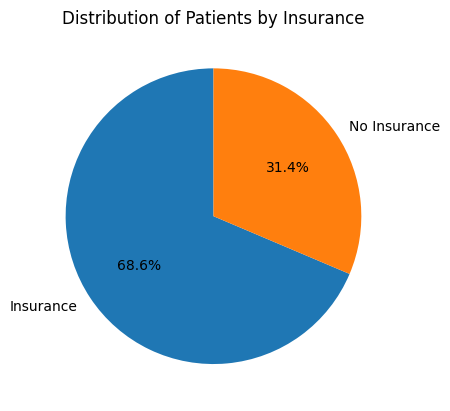

In [6]:
#count the number of patients with insurance
insurance_count = train_data['Insurance'].value_counts()
labels = ['Insurance','No Insurance']
plt.title('Distribution of Patients by Insurance')
# We plot the pie chart
plt.pie(insurance_count,labels=labels,autopct='%1.1f%%', startangle=90)
plt.show()

 - approximately 68.6% of the patients in the dataset have insurance while 31.4% of the patients do not have insurance.

##### 4. Is Blood Pressure affected by Age?

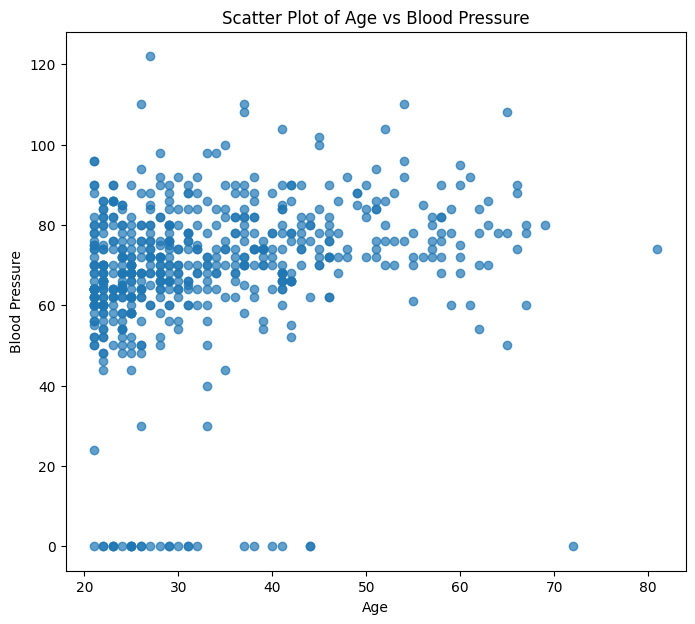

In [7]:
plt.figure(figsize=(8,7))
plt.scatter(train_data['Age'],train_data['PR'],alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.title("Scatter Plot of Age vs Blood Pressure")
plt.show()

- Most of the values lie between 40 and 80. 
- This represents the systolic or diastolic blood pressure values. 

##### Hypothesis Testing

In [9]:
# defining Negative and Positive Sepsis Cases
Sepsis_Negative = train_data[train_data['Sepssis']=='Negative']
Sepsis_Positive = train_data[train_data['Sepssis']=='Positive']

t,p = stats.ttest_ind(Sepsis_Negative['Age'],Sepsis_Positive['Age'],equal_var=False)

# Separate data into two groups: patients with sepsis (Sepsis: Positive) and without sepsis (Sepsis: Negative)
sepsis_positive = train_data[train_data['Sepssis'] == 'Positive']['Age']
sepsis_negative = train_data[train_data['Sepssis'] == 'Negative']['Age']

# Set significance level (alpha)
alpha = 0.05

 # Perform a two-sample independent t-test
t_stat, p_value = stats.ttest_ind(sepsis_positive, sepsis_negative, equal_var=False)


In [10]:
# Print the t-statistic and p-value
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 5.398028835705048
P-value: 1.085959278630566e-07


In [11]:
# Compare p-value to alpha to make a decision
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in age between patients with and without sepsis.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in age between patients with and without sepsis.")

Reject the null hypothesis. There is a significant difference in age between patients with and without sepsis.


#### Data Preparation

- This involves removing duplicates, handling missing values

In [3]:
# Renaming the seppsis, BMI and Blood pressure columns
train = train_data.rename(columns={'Sepssis': 'Sepsis', 'M11': 'BMI', 'PRG': 'Plasma_glucose', 'PL': 'Blood_Work_R1','PR': 'Blood_Pressure','SK': 'Blood_Work_R2', 'TS': 'Blood_Work_R3', 'BD2': 'Blood_Work_R4', 'Age': 'Patient_age'})
 
# Test dataset
test = test_data.rename(columns={'M11': 'BMI', 'PR': 'Blood_Pressure'})

train.head()

,ID,Plasma_glucose,Blood_Work_R1,Blood_Pressure,Blood_Work_R2,Blood_Work_R3,BMI,Blood_Work_R4,Patient_age,Insurance,Sepsis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [13]:
#Checking for duplicates in the train dataset
train.duplicated().sum()

0

In [16]:
#check the number each of the categories occurs
print('The categories in the Spesis column are: ')
print(train['Sepsis'].value_counts())
#The number each of the Insurance Column
print('The categories in the Insurance column are: ')
print(train['Insurance'].value_counts())
#The number each of the categories occurs
print('The categories in the PRG column are: ')
print(train['PRG'].value_counts())

The categories in the Spesis column are: 
Sepsis
Negative    391
Positive    208
Name: count, dtype: int64
The categories in the Insurance column are: 
Insurance
1    411
0    188
Name: count, dtype: int64
The categories in the PRG column are: 
PRG
1     100
0      93
2      76
3      59
4      54
5      49
7      37
6      37
8      32
9      20
10     16
12      8
11      7
13      7
14      2
15      1
17      1
Name: count, dtype: int64


In [4]:
# drop unnecessary columns
train = train.drop(columns=['ID', 'Patient_age','Insurance'])

#### Split data into input(X) and target(y) features

In [5]:
# defining data into  x and y
X = train.drop('Sepsis', axis=1)
y = train['Sepsis']

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Plasma_glucose  599 non-null    int64  
 1   Blood_Work_R1   599 non-null    int64  
 2   Blood_Pressure  599 non-null    int64  
 3   Blood_Work_R2   599 non-null    int64  
 4   Blood_Work_R3   599 non-null    int64  
 5   BMI             599 non-null    float64
 6   Blood_Work_R4   599 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 32.9 KB


#### Splitting data into training and evaluation

In [8]:
# using train test split to split the data with test size of 0.2
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42,stratify=y)

#### Creating a Pipeline to preprocess the data

In [9]:
input_features =  X.columns

In [10]:

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ("scaler", StandardScaler(), input_features),
        ("log_transformations", FunctionTransformer(np.log1p), input_features)
    ])

# Define pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

#### Label/Target Encoding

In [11]:
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

### `Modeling`

##### ML Pipeline(Unbalanced Data)

In [17]:
# instantiating our models and training them with unbalanced data
models = [
    ('Logistic Regression',LogisticRegression(max_iter=1000)),
    ('SVC',SVC(random_state=42,probability=True)),
    ('Random Forest',RandomForestClassifier(random_state=42)),
    ('Naives_Bay',GaussianNB()),
    ('Gradient Boosting',GradientBoostingClassifier()),

]
# defining the metrics to be fetched
unbalanced_metrics = pd.DataFrame(columns=['Model_name','Accuracy','Precision','Recall','F1_score'])
for model_name,classifier in models:
    pipeline=Pipeline(steps=[
        ('preprocessor',preprocessor),
        ('classifier',classifier),
    ])

    pipeline.fit(X_train,y_train_encoded)
    
    # predicting on the X_test
    y_pred = pipeline.predict(X_test)

    metrics = classification_report(y_test_encoded,y_pred,output_dict=True)
   
    accuracy = metrics['accuracy']
    precision = metrics['weighted avg']['precision']
    recall = metrics['weighted avg']['recall']
    f1_score = metrics['weighted avg']['f1-score']
    unbalanced_metrics.loc[len(unbalanced_metrics)]=[model_name,accuracy,recall,precision,f1_score]

unbalanced_metrics
 

,Model_name,Accuracy,Precision,Recall,F1_score
0,Logistic Regression,0.750000,0.750000,0.750000,0.750000
1,SVC,0.733333,0.733333,0.728370,0.730000
2,Random Forest,0.691667,0.691667,0.684191,0.686697
3,Naives_Bay,0.675000,0.675000,0.676820,0.675863
4,Gradient Boosting,0.725000,0.725000,0.718772,0.720568


### `Evaluation`

##### Train and compare data(Random Oversampler)

In [18]:
# using over sampling method on the dataset to balance your dataset
sampler = RandomOverSampler(random_state=42)
X_train_resampled,y_train_resampled = sampler.fit_resample(X_train,y_train_encoded)

balanced_metrics = pd.DataFrame(columns=['Model_name','Accuracy','Precision','Recall','F1_score'])
# looping over the models
for model_name,classifier in models:
    pipeline=Pipeline(steps=[
        ('preprocessor',preprocessor),
        ('classifier',classifier),
    ])

    pipeline.fit(X_train_resampled,y_train_resampled)
    
    # predicting on the testing dataset
    oversampler_y_pred = pipeline.predict(X_test)
    
    balanced_result = classification_report(y_test_encoded,oversampler_y_pred ,output_dict=True)
   
    accuracy = balanced_result['accuracy']
    precision = balanced_result['weighted avg']['precision']
    recall = balanced_result['weighted avg']['recall']
    f1_score = balanced_result['weighted avg']['f1-score']
    balanced_metrics.loc[len(balanced_metrics)]=[model_name,accuracy,recall,precision,f1_score]

balanced_metrics

,Model_name,Accuracy,Precision,Recall,F1_score
0,Logistic Regression,0.716667,0.716667,0.742593,0.722569
1,SVC,0.691667,0.691667,0.720909,0.698313
2,Random Forest,0.716667,0.716667,0.723678,0.719378
3,Naives_Bay,0.666667,0.666667,0.699219,0.674044
4,Gradient Boosting,0.716667,0.716667,0.723678,0.719378


##### Train and balance dataset on SMote

In [19]:
all_pipeline ={}
smote_df = pd.DataFrame(columns=['Model_name','Accuracy','Precision','Recall','F1_score'])
for model_name,classifier in models:
    pipeline=imbpipeline(steps=[
        ('preprocessor',preprocessor),
        ('smote',SMOTE(random_state=42)),
        ('classifier',classifier),
    ])

    pipeline.fit(X_train,y_train_encoded)
    
    # predicting on the testing dataset
    smote_y_pred = pipeline.predict(X_test)
    all_pipeline[model_name] = pipeline
    smote_dict = classification_report(y_test_encoded,smote_y_pred,output_dict=True)
   
    accuracy = smote_dict['accuracy']
    precision = smote_dict['weighted avg']['precision']
    recall = smote_dict['weighted avg']['recall']
    f1_score = smote_dict['weighted avg']['f1-score']
    smote_df.loc[len(smote_df)]=[model_name,accuracy,recall,precision,f1_score]

smote_df

,Model_name,Accuracy,Precision,Recall,F1_score
0,Logistic Regression,0.733333,0.733333,0.758923,0.738889
1,SVC,0.716667,0.716667,0.737217,0.722034
2,Random Forest,0.675000,0.675000,0.684800,0.678748
3,Naives_Bay,0.658333,0.658333,0.677707,0.664406
4,Gradient Boosting,0.666667,0.666667,0.678819,0.671111


#### Hyperparameter Tuning

In [23]:
# Define a dictionary of models along with their respective hyperparameters for tuning
models_params = {
    'LogisticRegression': {
        'max_iter': [1000, 2000],  
        'solver': ['liblinear', 'lbfgs']
    },
    'RandomForestClassifier': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'GaussianNB': {},  
    'GradientBoostingClassifier': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    
}

# Create PrettyTable to display results
table = PrettyTable()
table.field_names = ["Model", "Best Parameters", "Best Score"]

# Perform grid search
for model_name, params in models_params.items():
    if model_name == 'GradientBoostingClassifier':
         model = GradientBoostingClassifier(verbose=0)
    else:
         model = globals()[model_name]()  # Instantiate the model
    grid_search = GridSearchCV(estimator=model, param_grid=params, scoring='accuracy', cv=5, refit=True)
    grid_search.fit(X_train, y_train)
    
    table.add_row([model_name, grid_search.best_params_, grid_search.best_score_])

# Print the table
print(table)


+----------------------------+-----------------------------------------------------------------+--------------------+
|           Model            |                         Best Parameters                         |     Best Score     |
+----------------------------+-----------------------------------------------------------------+--------------------+
|     LogisticRegression     |              {'max_iter': 1000, 'solver': 'lbfgs'}              | 0.7808552631578947 |
|   RandomForestClassifier   | {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100} | 0.7808333333333334 |
|         GaussianNB         |                                {}                               | 0.7891666666666668 |
| GradientBoostingClassifier |   {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}  | 0.7766885964912281 |
+----------------------------+-----------------------------------------------------------------+--------------------+


### `Model Persistence`

Save the pipeline

In [25]:
# Define the best hyperparameters for the Random Forest Classifier
best_params_logistic = {
    'max_iter': [1000, 2000],  
    'solver': ['liblinear', 'lbfgs']
}


# Instantiate the best Random Forest model with the best hyperparameters
best_logistic_model = LogisticRegression(**best_params_logistic)

# Create a pipeline with the preprocessor and the best Random Forest model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Assuming 'preprocessor' is defined earlier
    ('classifier', best_logistic_model)
])

# Define the best hyperparameters for the Gradient Boosting Classifier
best_params_gaussian= {}


# Instantiate the best Random Forest model with the best hyperparameters
best_gaussian_model = GaussianNB(**best_params_gaussian)

# Create a pipeline with the preprocessor and the best Gradient Boosting model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Assuming 'preprocessor' is defined earlier
    ('classifier', best_gaussian_model)
])


# Create a directory named 'models' if it does not exist
if not os.path.exists('models'):
    os.makedirs('models')

# Save the pipeline and the best Random Forest model in the 'models' folder
joblib.dump(best_logistic_model , 'models/best_logistic_model .joblib')
joblib.dump(pipeline, 'models/encoder.joblib')
joblib.dump(best_gaussian_model, 'models/best_gaussian_model.joblib')

print("Pipeline and best 2 models saved successfully in the 'models' folder.")


Pipeline and best 2 models saved successfully in the 'models' folder.
